# Importing and Merging Data Files 

In [1]:
import pandas as pd

# Keep all files in same folder while running

calls = pd.read_csv("callsf0d4f5a.csv")
customers = pd.read_csv("customers2afd6ea.csv")
reason = pd.read_csv("reason18315ff.csv")
sentiment = pd.read_csv("sentiment_statisticscc1e57a.csv")

In [2]:
# Merging all Data Files into a single dataset merged_data

merged_data = pd.merge(calls, customers, on='customer_id', how='left')

merged_data = pd.merge(merged_data, reason, on='call_id', how='left')

merged_data = pd.merge(merged_data, sentiment[['call_id','agent_tone','customer_tone','average_sentiment','silence_percent_average']], on='call_id', how='left')
merged_data.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...,Matthew Foster,4.0,Voluntary Cancel,neutral,angry,-0.04,0.39
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...,Tammy Walters,NaN,Booking,calm,neutral,0.02,0.35
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...,Jeffery Dixon,NaN,IRROPS,neutral,polite,-0.13,0.32
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...,David Wilkins,2.0,Upgrade,neutral,frustrated,-0.20,0.20
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...,Elizabeth Daniels,0.0,Seating,neutral,polite,-0.05,0.35


# Converting to Proper Datatypes

In [3]:
#Converting datetime columns to correct datatype and adding new columns accordingly

merged_data[['call_start_datetime', 'agent_assigned_datetime', 'call_end_datetime']] = merged_data[['call_start_datetime', 'agent_assigned_datetime', 'call_end_datetime']].apply(pd.to_datetime)
merged_data['Speed_To_Answer_Time'] = merged_data['agent_assigned_datetime'] - merged_data['call_start_datetime']
merged_data['Handling_Time'] = merged_data['call_end_datetime'] - merged_data['agent_assigned_datetime']
merged_data['Speed_To_Answer_Time_(minutes)'] = merged_data['Speed_To_Answer_Time'].dt.total_seconds() / 60
merged_data['Handling_Time_(minutes)'] = merged_data['Handling_Time'].dt.total_seconds() / 60
merged_data.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average,Speed_To_Answer_Time,Handling_Time,Speed_To_Answer_Time_(minutes),Handling_Time_(minutes)
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,Matthew Foster,4.0,Voluntary Cancel,neutral,angry,-0.04,0.39,0 days 00:07:00,0 days 00:31:00,7.0,31.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,Tammy Walters,NaN,Booking,calm,neutral,0.02,0.35,0 days 00:03:00,0 days 00:12:00,3.0,12.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,Jeffery Dixon,NaN,IRROPS,neutral,polite,-0.13,0.32,0 days 00:08:00,0 days 00:19:00,8.0,19.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,David Wilkins,2.0,Upgrade,neutral,frustrated,-0.20,0.20,0 days 00:05:00,0 days 00:07:00,5.0,7.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,Elizabeth Daniels,0.0,Seating,neutral,polite,-0.05,0.35,0 days 00:10:00,0 days 00:09:00,10.0,9.0


# Dealing with Missing Values

In [4]:
import numpy as np
 
#Calculating % of missing values in each column

features_with_na=[features for features in merged_data.columns if merged_data[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(merged_data[feature].isnull().mean(), 4)*100,  ' % missing values')

elite_level_code 35.88  % missing values
primary_call_reason 7.180000000000001  % missing values
agent_tone 0.3  % missing values
average_sentiment 0.15  % missing values


In [5]:
# Calculating the most common agent_tone for each agent_id
most_common_tone = merged_data.groupby('agent_id')['agent_tone'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Replacing NaN values in agent_tone with the most common tone
merged_data['agent_tone'] = merged_data['agent_tone'].fillna(merged_data['agent_id'].map(most_common_tone))

merged_data.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average,Speed_To_Answer_Time,Handling_Time,Speed_To_Answer_Time_(minutes),Handling_Time_(minutes)
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,Matthew Foster,4.0,Voluntary Cancel,neutral,angry,-0.04,0.39,0 days 00:07:00,0 days 00:31:00,7.0,31.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,Tammy Walters,NaN,Booking,calm,neutral,0.02,0.35,0 days 00:03:00,0 days 00:12:00,3.0,12.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,Jeffery Dixon,NaN,IRROPS,neutral,polite,-0.13,0.32,0 days 00:08:00,0 days 00:19:00,8.0,19.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,David Wilkins,2.0,Upgrade,neutral,frustrated,-0.20,0.20,0 days 00:05:00,0 days 00:07:00,5.0,7.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,Elizabeth Daniels,0.0,Seating,neutral,polite,-0.05,0.35,0 days 00:10:00,0 days 00:09:00,10.0,9.0


In [6]:
# Calculating the most common agent_tone for each agent_id
most_common_tone = merged_data.groupby('agent_tone')['average_sentiment'].mean()

# Replacing NaN values in agent_tone with the most common tone
merged_data['average_sentiment'] = merged_data['average_sentiment'].fillna(merged_data['agent_tone'].map(most_common_tone))

merged_data.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average,Speed_To_Answer_Time,Handling_Time,Speed_To_Answer_Time_(minutes),Handling_Time_(minutes)
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,Matthew Foster,4.0,Voluntary Cancel,neutral,angry,-0.04,0.39,0 days 00:07:00,0 days 00:31:00,7.0,31.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,Tammy Walters,NaN,Booking,calm,neutral,0.02,0.35,0 days 00:03:00,0 days 00:12:00,3.0,12.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,Jeffery Dixon,NaN,IRROPS,neutral,polite,-0.13,0.32,0 days 00:08:00,0 days 00:19:00,8.0,19.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,David Wilkins,2.0,Upgrade,neutral,frustrated,-0.20,0.20,0 days 00:05:00,0 days 00:07:00,5.0,7.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,Elizabeth Daniels,0.0,Seating,neutral,polite,-0.05,0.35,0 days 00:10:00,0 days 00:09:00,10.0,9.0


In [7]:
# Now, extract unique values of Primary Call Reasons
unique_values = merged_data['primary_call_reason'].unique()
print(unique_values)

['Voluntary  Cancel' 'Booking' 'IRROPS' 'Upgrade' 'Seating'
 'Mileage   Plus' 'Checkout' nan 'Voluntary   Change' 'Post Flight'
 'Check In' 'Other  Topics' 'Communications' 'Schedule Change'
 'Products & Services' 'IRROPS  ' 'Digital   Support' 'Seating  '
 'Disability' 'Unaccompanied Minor' ' Baggage' 'Traveler  Updates'
 'Communications  ' 'ETC' 'Upgrade  ' 'Unaccompanied Minor  '
 'Voluntary Change' 'Voluntary Change  ' 'Checkout  ' 'Mileage Plus'
 'Mileage Plus  ' 'Booking  ' 'Baggage  ' 'Post-Flight' 'Post-Flight  '
 'Schedule Change  ' 'Baggage' 'Traveler Updates' 'Voluntary Cancel'
 'Check-In' 'Products and Services' 'Check-In  ' 'Other Topics'
 'Other Topics  ' 'ETC  ' 'Disability  ' 'Digital Support'
 'Digital Support  ' 'Voluntary Cancel  ' 'Products and Services  '
 'Traveler Updates  ' 'Traveler   Updates' 'Digital  Support'
 'Mileage  Plus' 'Voluntary  Change']


In [8]:
# Function to clean values in 'primary_call_reason' and give uniform unique values 
def clean_value(value):
    if pd.isna(value):
        return value
    return value.replace(' ', '').replace('-', '').replace('&', 'and').lower()

merged_data['primary_call_reason'] = merged_data['primary_call_reason'].apply(clean_value)

unique_cleaned_values = merged_data['primary_call_reason'].unique()
print(unique_cleaned_values)

['voluntarycancel' 'booking' 'irrops' 'upgrade' 'seating' 'mileageplus'
 'checkout' nan 'voluntarychange' 'postflight' 'checkin' 'othertopics'
 'communications' 'schedulechange' 'productsandservices' 'digitalsupport'
 'disability' 'unaccompaniedminor' 'baggage' 'travelerupdates' 'etc']


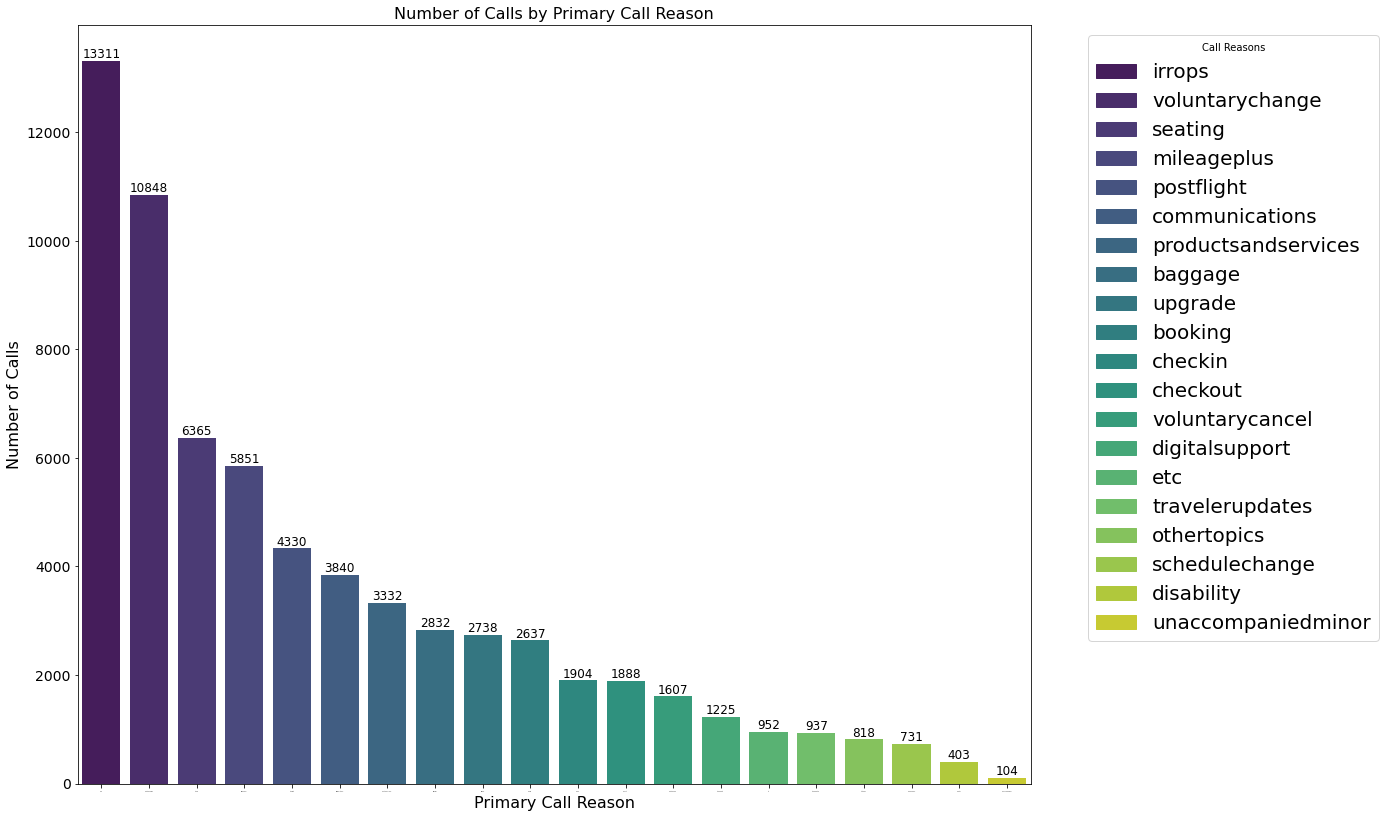

['irrops', 'voluntarychange', 'seating', 'mileageplus', 'postflight', 'communications', 'productsandservices', 'baggage', 'upgrade', 'booking', 'checkin', 'checkout', 'voluntarycancel', 'digitalsupport', 'etc', 'travelerupdates', 'othertopics', 'schedulechange', 'disability', 'unaccompaniedminor']


In [9]:
# plotting Number of Calls by Primary Call Reason to get most common Primary call Reasons
import matplotlib.pyplot as plt
import seaborn as sns

call_reason_counts = merged_data['primary_call_reason'].value_counts().reset_index()
call_reason_counts.columns = ['primary_call_reason', 'call_id_count']  

call_reason_counts = call_reason_counts.sort_values(by='call_id_count', ascending=False)

plt.figure(figsize=(20, 12))
bar_plot = sns.barplot(x='primary_call_reason', y='call_id_count', data=call_reason_counts, palette='viridis')

for index, row in call_reason_counts.iterrows():
    bar_plot.text(index, row.call_id_count, f'{row.call_id_count}', 
                  color='black', ha='center', va='bottom', fontsize=12)

plt.title('Number of Calls by Primary Call Reason', fontsize=16)
plt.xlabel('Primary Call Reason', fontsize=16)
plt.ylabel('Number of Calls', fontsize=16)
plt.xticks(fontsize=0)
plt.yticks(fontsize=14)

handles = [plt.Rectangle((0, 0), 1, 1, color=bar_plot.patches[i].get_facecolor()) for i in range(len(bar_plot.patches))]
labels = call_reason_counts['primary_call_reason'].tolist() 
plt.legend(handles, labels, title='Call Reasons', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)

plt.tight_layout(pad=3.0)
plt.show()
print(labels)

In [10]:
# Using NLTK (natural language toolkit) to extract most frequent words from the above
import re
import nltk

from nltk.util import ngrams

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Satyam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
#List of Unique Values of Primary Call Reasons
terms = ['irrops', 'Voluntary Cancel', 'Voluntary Change', 'Booking', 'Upgrade', 'Seating', 
         'Mileage Plus', 'Check out', 'Post Flight', 'Check In', 'Check-in', 'Check-out', 'Other Topics', 
         'Communications', 'Schedule Change', 'Products', 'Digital Support', 'Disability',
         'Unaccompanied Minor', 'Baggage', 'Traveler Updates', 'ETC']

terms_cleaned = [re.sub(r'\s+', ' ', term.strip().lower()) for term in terms]

#We can prioritize the most common reasons if a transcript has more than one words with highest frequency
priority_order = ['irrops', 'voluntarychange', 'seating', 'mileageplus', 'postflight', 
                  'communications', 'productsandservices', 'baggage', 'upgrade', 
                  'booking', 'checkin', 'checkout', 'voluntarycancel', 
                  'digitalsupport', 'etc', 'travelerupdates', 'othertopics', 
                  'schedulechange', 'disability', 'unaccompaniedminor']


def extract_ngrams(text, n=2):
    tokens = nltk.word_tokenize(text.lower())
    
    unigrams = tokens
    bigrams = [' '.join(gram) for gram in ngrams(tokens, 2)]
    
    return unigrams + bigrams

def match_ngrams_with_terms(text, terms_cleaned):
    ngrams_in_text = extract_ngrams(text)
    return list(ngram for ngram in ngrams_in_text if ngram in terms_cleaned)

missing_reason_rows = merged_data[merged_data['primary_call_reason'].isnull()]

print(f"Total rows with missing primary_call_reason: {len(missing_reason_rows)}")
print(f"Rows with missing primary_call_reasons but no transcript: {len(missing_reason_rows[missing_reason_rows['call_transcript'].isna()])}")


def debug_fill_missing_reasons(row, terms_cleaned, priority_order):
    if pd.isnull(row['primary_call_reason']):
        matched_issues = match_ngrams_with_terms(row['call_transcript'], terms_cleaned)
        
        if len(matched_issues) == 0:
            return 'Other Topics'
        
        issue_counts = {issue: matched_issues.count(issue) for issue in matched_issues}
        sorted_issues = sorted(issue_counts.items(), key=lambda x: (-x[1], priority_order.index(x[0]) if x[0] in priority_order else float('inf')))
        
        return sorted_issues[0][0]
    
    return row['primary_call_reason']

merged_data['primary_call_reason'] = merged_data.apply(lambda row: debug_fill_missing_reasons(row, terms_cleaned, priority_order), axis=1)

missing_after = merged_data['primary_call_reason'].isna().sum()
print(f"Missing primary_call_reasons after update: {missing_after}")


Total rows with missing primary_call_reason: 5157
Rows with missing primary_call_reasons but no transcript: 0
Missing primary_call_reasons after update: 0


In [12]:
# Again cleaning values in 'primary_call_reason' and giving uniform unique values 

merged_data['primary_call_reason'] = merged_data['primary_call_reason'].apply(clean_value)

unique_cleaned_values = merged_data['primary_call_reason'].unique()
print(unique_cleaned_values)

['voluntarycancel' 'booking' 'irrops' 'upgrade' 'seating' 'mileageplus'
 'checkout' 'othertopics' 'voluntarychange' 'postflight' 'checkin'
 'communications' 'schedulechange' 'productsandservices' 'digitalsupport'
 'disability' 'unaccompaniedminor' 'baggage' 'travelerupdates' 'etc']


In [13]:
# Add 'Unknown' to the list of categories for nan values to include those values in analysis

tone_order = ['Unknown',0, 1, 2, 3, 4, 5]  

merged_data['elite_level_code'] = pd.Categorical(merged_data['elite_level_code'], categories=tone_order, ordered=True)

#Replace NAN values with "Unknown"
merged_data['elite_level_code'] = merged_data['elite_level_code'].fillna('Unknown')


print(merged_data['elite_level_code'].unique())

[4, 'Unknown', 2, 0, 5, 1, 3]
Categories (7, object): ['Unknown' < 0 < 1 < 2 < 3 < 4 < 5]


# Adding New Columns by Grouping By Agents 

In [14]:
agent_summary = merged_data.groupby('agent_id').agg(
    Count_of_call_id=('call_id', 'count'),
    Average_Handling_Time_minutes=('Handling_Time_(minutes)', 'mean')
).reset_index()


print(agent_summary)

print("Overall Average Handling Time (minutes):", agent_summary['Average_Handling_Time_minutes'].mean())
new_data = pd.merge(merged_data, agent_summary, on='agent_id', how='left')
new_data.head()

     agent_id  Count_of_call_id  Average_Handling_Time_minutes
0      102574                 2                      60.000000
1      103651               298                      12.456376
2      106000               113                      11.486726
3      107876                 6                      16.500000
4      112609                11                      14.181818
..        ...               ...                            ...
378    981776               309                      11.718447
379    981779               227                      11.396476
380    982131               270                      12.037037
381    992521                46                      15.826087
382    993862               298                      11.265101

[383 rows x 3 columns]
Overall Average Handling Time (minutes): 12.58886228593281


,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,customer_name,elite_level_code,primary_call_reason,agent_tone,customer_tone,average_sentiment,silence_percent_average,Speed_To_Answer_Time,Handling_Time,Speed_To_Answer_Time_(minutes),Handling_Time_(minutes),Count_of_call_id,Average_Handling_Time_minutes
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,Matthew Foster,4,voluntarycancel,neutral,angry,-0.04,0.39,0 days 00:07:00,0 days 00:31:00,7.0,31.0,471,10.830149
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,Tammy Walters,Unknown,booking,calm,neutral,0.02,0.35,0 days 00:03:00,0 days 00:12:00,3.0,12.0,430,11.197674
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,Jeffery Dixon,Unknown,irrops,neutral,polite,-0.13,0.32,0 days 00:08:00,0 days 00:19:00,8.0,19.0,393,11.356234
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,David Wilkins,2,upgrade,neutral,frustrated,-0.20,0.20,0 days 00:05:00,0 days 00:07:00,5.0,7.0,392,10.196429
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,Elizabeth Daniels,0,seating,neutral,polite,-0.05,0.35,0 days 00:10:00,0 days 00:09:00,10.0,9.0,328,10.829268


# Analysis Based On Agents and Number of Calls

angry 6.57
frustrated 10.28
neutral 12.47
calm 10.44
polite 3.67


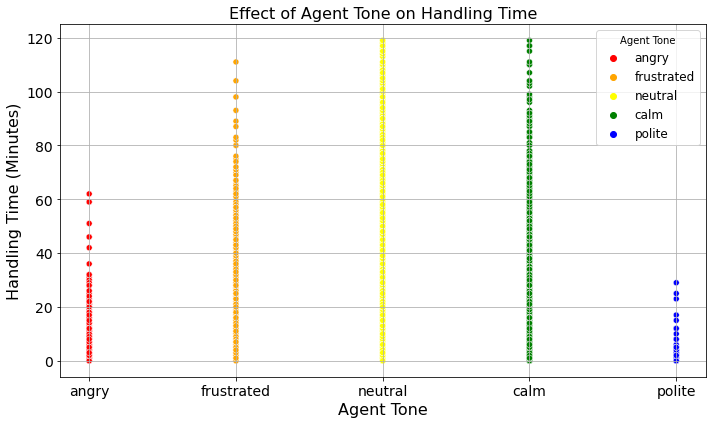

In [15]:
tone_order = ['angry', 'frustrated', 'neutral', 'calm', 'polite']
new_data['agent_tone'] = pd.Categorical(new_data['agent_tone'], categories=tone_order, ordered=True)

custom_palette = ['red', 'orange', 'yellow', 'green', 'blue']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_data, x='agent_tone', y='Handling_Time_(minutes)', hue='agent_tone', palette=custom_palette)

average_aht = new_data.groupby('agent_tone')['Handling_Time_(minutes)'].mean().reset_index()

for i in range(len(average_aht)):
    print(tone_order[i], f'{average_aht["Handling_Time_(minutes)"].iloc[i]:.2f}')

plt.title('Effect of Agent Tone on Handling Time', fontsize=16)
plt.xlabel('Agent Tone', fontsize=16)
plt.ylabel('Handling Time (Minutes)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(title='Agent Tone', fontsize=12)
plt.grid()
plt.tight_layout()
plt.show()

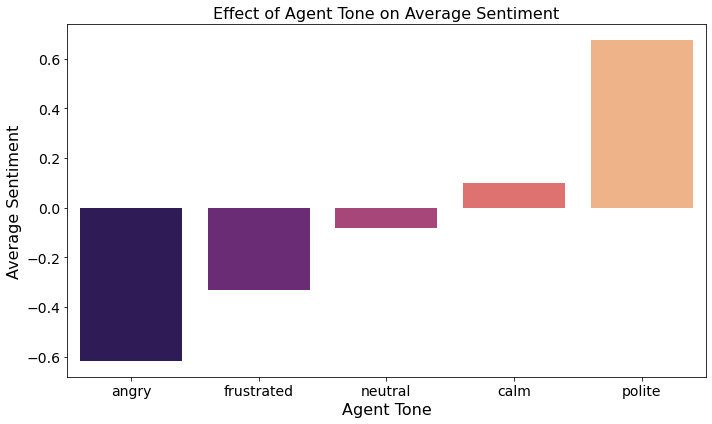

angry -0.62
frustrated -0.33
neutral -0.08
calm 0.10
polite 0.67


In [16]:
average_sentiment = new_data.groupby('agent_tone')['average_sentiment'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='agent_tone', y='average_sentiment', data=average_sentiment, palette='magma')

plt.title('Effect of Agent Tone on Average Sentiment', fontsize=16)
plt.xlabel('Agent Tone', fontsize=16)
plt.ylabel('Average Sentiment', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()

for i in range(len(average_sentiment)):
    print(tone_order[i], f'{average_sentiment["average_sentiment"].iloc[i]:.2f}')

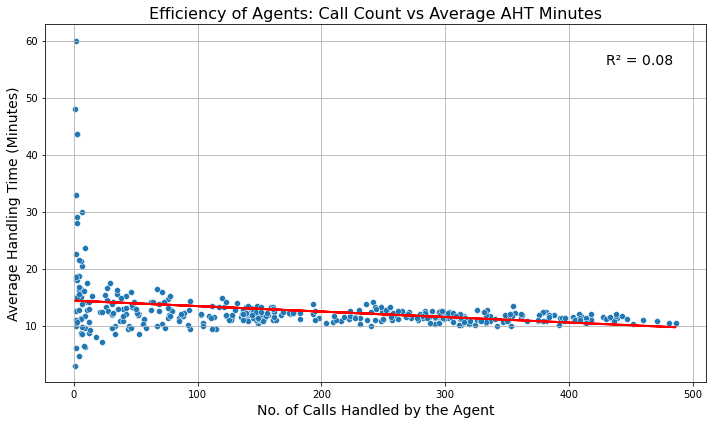

In [17]:
from sklearn.linear_model import LinearRegression

plt.figure(figsize=(10, 6))
sns.scatterplot(data=agent_summary, x='Count_of_call_id', y='Average_Handling_Time_minutes')

X = agent_summary['Count_of_call_id'].values.reshape(-1, 1)
y = agent_summary['Average_Handling_Time_minutes'].values

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.plot(agent_summary['Count_of_call_id'], y_pred, color='red', linewidth=2)

r_squared = model.score(X, y)
plt.text(0.9, 0.9, f'R² = {r_squared:.2f}', ha='center', va='center', transform=plt.gca().transAxes, fontsize=14)

plt.title('Efficiency of Agents: Call Count vs Average AHT Minutes', fontsize=16)
plt.xlabel('No. of Calls Handled by the Agent', fontsize=14)
plt.ylabel('Average Handling Time (Minutes)', fontsize=14)

plt.grid(True)
plt.tight_layout()
plt.show()


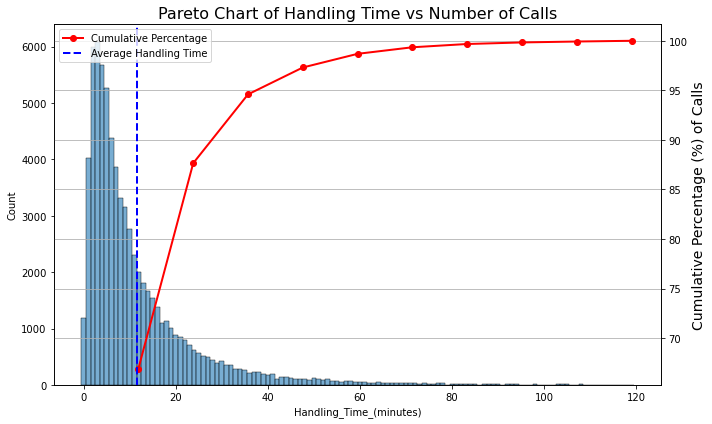

In [18]:
plt.figure(figsize=(10, 6))
hist_data, bin_edges = np.histogram(new_data['Handling_Time_(minutes)'], bins=10)

sns.histplot(data=new_data, x='Handling_Time_(minutes)', bins=10, discrete=True, stat='count', alpha=0.6)

cumulative_counts = np.cumsum(hist_data)
cumulative_percentage = 100 * cumulative_counts / cumulative_counts[-1]  

ax2 = plt.gca().twinx()  
ax2.plot(bin_edges[1:], cumulative_percentage, color='red', marker='o', label='Cumulative Percentage', linewidth=2)
ax2.set_ylabel('Cumulative Percentage (%)', fontsize=14)

mean_aht = new_data['Handling_Time_(minutes)'].mean()
plt.axvline(mean_aht, color='blue', linestyle='dashed', linewidth=2, label='Average Handling Time')

plt.title('Pareto Chart of Handling Time vs Number of Calls', fontsize=16)
plt.xlabel('Handling Time (Minutes)', fontsize=14)
plt.ylabel('Cumulative Percentage (%) of Calls', fontsize=14)

plt.grid(True)
ax2.legend(loc='upper left')
plt.tight_layout()

plt.show()

# Analysis based on Primary Call Reasons

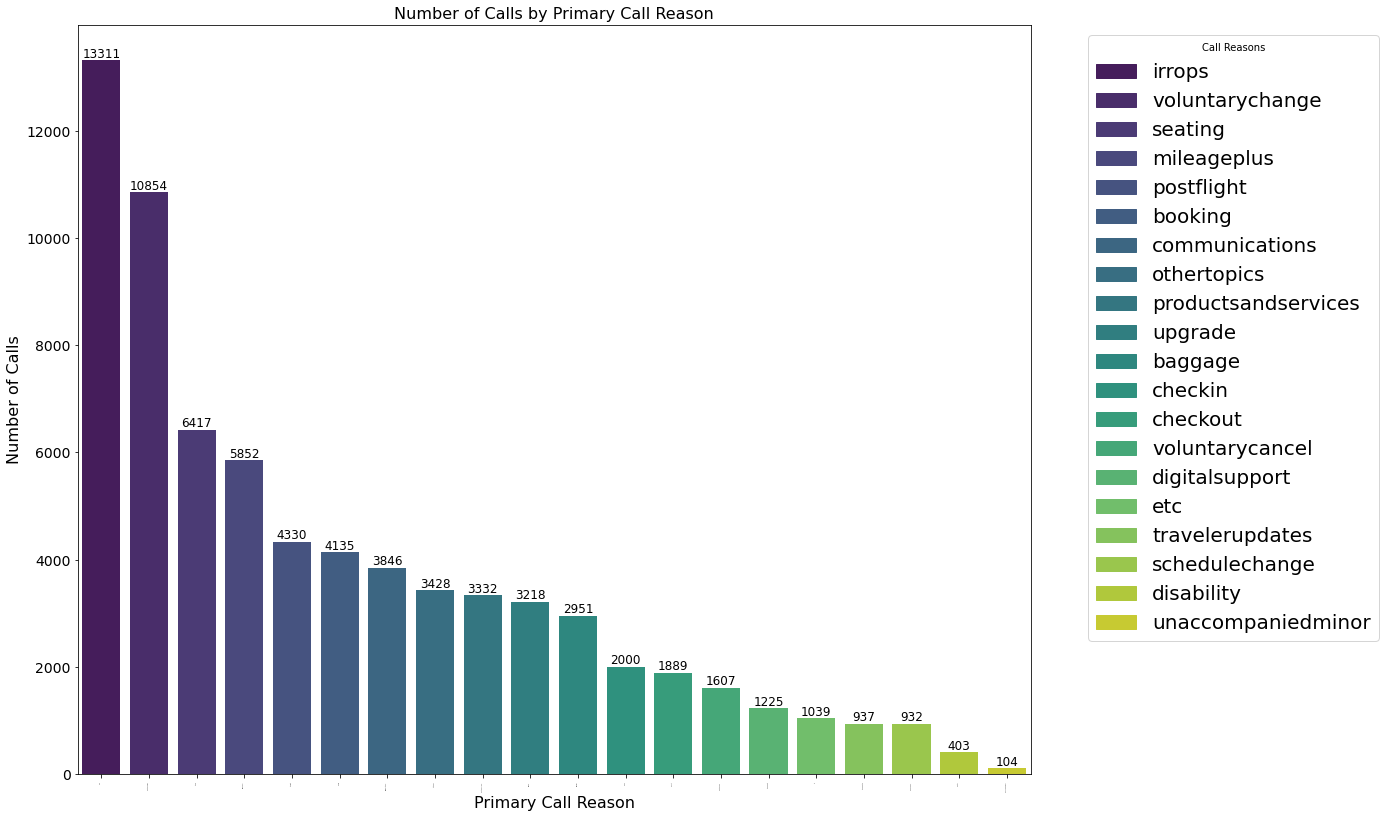

['irrops', 'voluntarychange', 'seating', 'mileageplus', 'postflight', 'booking', 'communications', 'othertopics', 'productsandservices', 'upgrade', 'baggage', 'checkin', 'checkout', 'voluntarycancel', 'digitalsupport', 'etc', 'travelerupdates', 'schedulechange', 'disability', 'unaccompaniedminor']


In [19]:
call_reason_counts = new_data['primary_call_reason'].value_counts().reset_index()
call_reason_counts.columns = ['primary_call_reason', 'call_id_count']  

call_reason_counts = call_reason_counts.sort_values(by='call_id_count', ascending=False)

plt.figure(figsize=(20, 12))
bar_plot = sns.barplot(x='primary_call_reason', y='call_id_count', data=call_reason_counts, palette='viridis')

for index, row in call_reason_counts.iterrows():
    bar_plot.text(index, row.call_id_count, f'{row.call_id_count}', 
                  color='black', ha='center', va='bottom', fontsize=12)

plt.title('Number of Calls by Primary Call Reason', fontsize=16)
plt.xlabel('Primary Call Reason', fontsize=16)
plt.ylabel('Number of Calls', fontsize=16)
plt.xticks(rotation=90, ha='right', fontsize=0)  
plt.yticks(fontsize=14)

handles = [plt.Rectangle((0, 0), 1, 1, color=bar_plot.patches[i].get_facecolor()) for i in range(len(bar_plot.patches))]
labels = call_reason_counts['primary_call_reason'].tolist()  
plt.legend(handles, labels, title='Call Reasons', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)

plt.tight_layout(pad=3.0)

plt.show()
print(labels)

In [20]:
# Get the most and least frequent primary call reasons
most_frequent_reason = call_reason_counts.iloc[0]['primary_call_reason']
least_frequent_reason = call_reason_counts.iloc[-1]['primary_call_reason']

# Calculate the average handling time for the most and least frequent reasons
avg_ht_most_frequent = new_data[new_data['primary_call_reason'] == most_frequent_reason]['Handling_Time_(minutes)'].mean()
avg_ht_least_frequent = new_data[new_data['primary_call_reason'] == least_frequent_reason]['Handling_Time_(minutes)'].mean()

# Calculate the percentage difference
if avg_ht_least_frequent > 0:  # To avoid division by zero
    percentage_difference = ((avg_ht_most_frequent - avg_ht_least_frequent) / avg_ht_least_frequent) * 100
else:
    percentage_difference = float('inf')  # Handle case where least frequent average is 0

# Print the results
print(f'Most Frequent Reason: {most_frequent_reason}, Avg HT: {avg_ht_most_frequent:.2f} minutes')
print(f'Least Frequent Reason: {least_frequent_reason}, Avg HT: {avg_ht_least_frequent:.2f} minutes')
print(f'Percentage Difference: {percentage_difference:.2f}%')


Most Frequent Reason: irrops, Avg HT: 13.09 minutes
Least Frequent Reason: unaccompaniedminor, Avg HT: 8.65 minutes
Percentage Difference: 51.21%


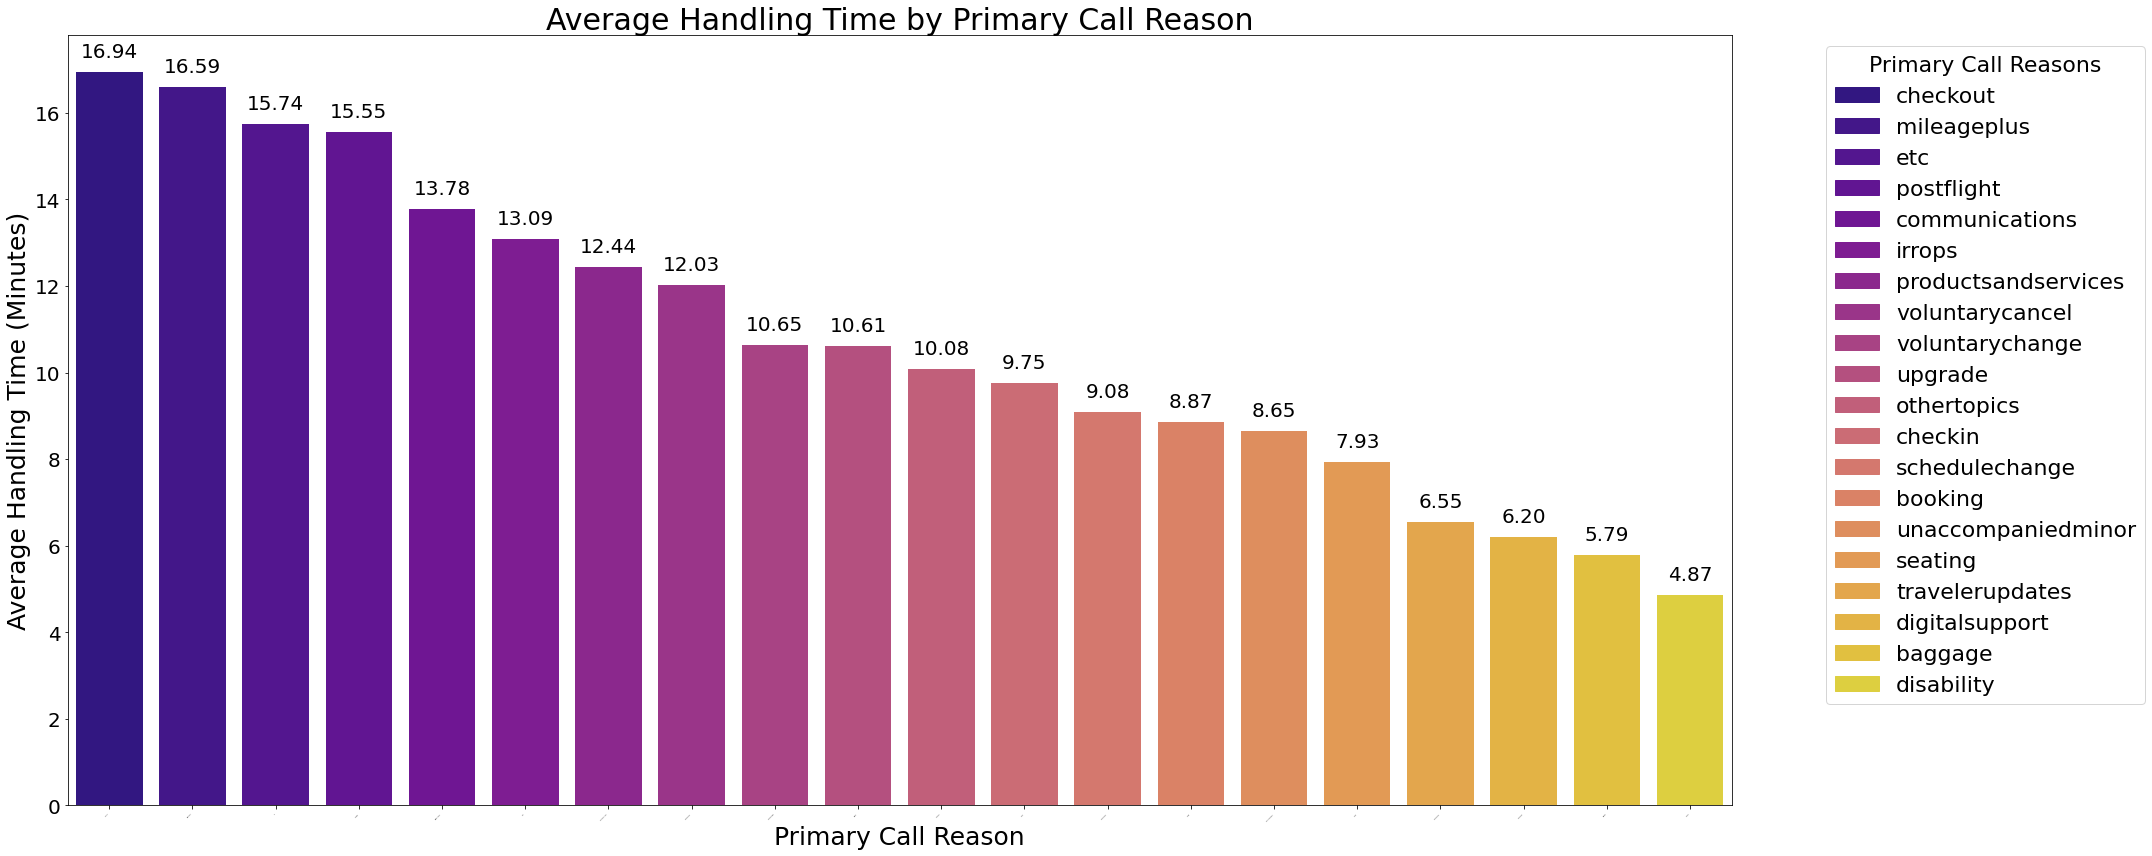

In [21]:
plt.figure(figsize=(30, 12))

grouped_data = new_data.groupby('primary_call_reason')['Handling_Time_(minutes)'].mean().sort_values(ascending=False)

bars = sns.barplot(x=grouped_data.index, y=grouped_data.values, palette='plasma')

plt.title('Average Handling Time by Primary Call Reason', fontsize=30)
plt.xlabel('Primary Call Reason', fontsize=25)
plt.ylabel('Average Handling Time (Minutes)', fontsize=25)

plt.xticks(rotation=45, ha='right', fontsize=0)
plt.yticks(fontsize=20)

for bar, value in zip(bars.patches, grouped_data.values):
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.25, f'{value:.2f}', 
              ha='center', va='bottom', fontsize=20)

handles = [plt.Rectangle((0,0),1,1, color=bar.get_facecolor()) for bar in bars.patches]
labels = grouped_data.index.tolist()

plt.legend(handles, labels, title='Primary Call Reasons', bbox_to_anchor=(1.05, 1), loc='upper left',title_fontsize=22, fontsize=22)

plt.tight_layout()

plt.show()


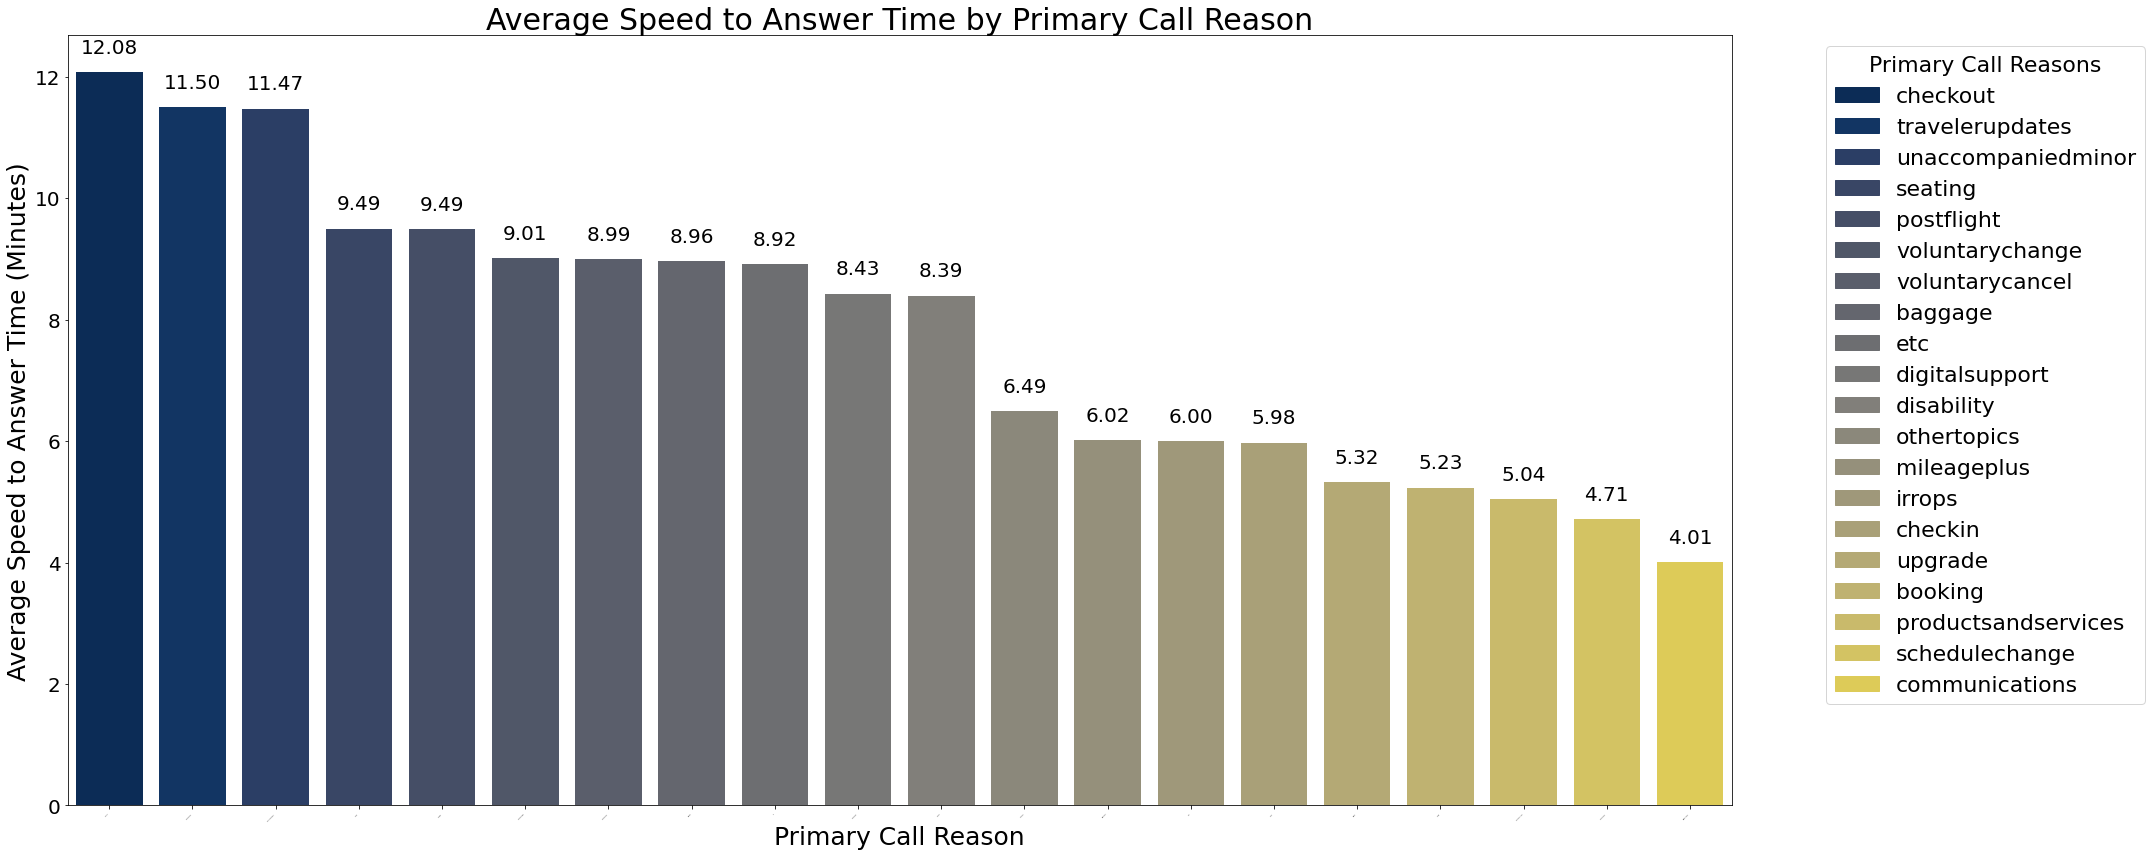

In [22]:
plt.figure(figsize=(30, 12))


grouped_data = new_data.groupby('primary_call_reason')['Speed_To_Answer_Time_(minutes)'].mean().sort_values(ascending=False)


bars = sns.barplot(x=grouped_data.index, y=grouped_data.values, palette='cividis')

plt.title('Average Speed to Answer Time by Primary Call Reason', fontsize=30)
plt.xlabel('Primary Call Reason', fontsize=25)
plt.ylabel('Average Speed to Answer Time (Minutes)', fontsize=25)

plt.xticks(rotation=45, ha='right', fontsize=0)
plt.yticks(fontsize=20)

for bar, value in zip(bars.patches, grouped_data.values):
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.25, f'{value:.2f}', 
              ha='center', va='bottom', fontsize=20)

handles = [plt.Rectangle((0,0),1,1, color=bar.get_facecolor()) for bar in bars.patches]
labels = grouped_data.index.tolist()

plt.legend(handles, labels, title='Primary Call Reasons', bbox_to_anchor=(1.05, 1), loc='upper left',title_fontsize=22, fontsize=22)

plt.tight_layout()

plt.show()


# Analysis based on Customer (Elite Level Code)

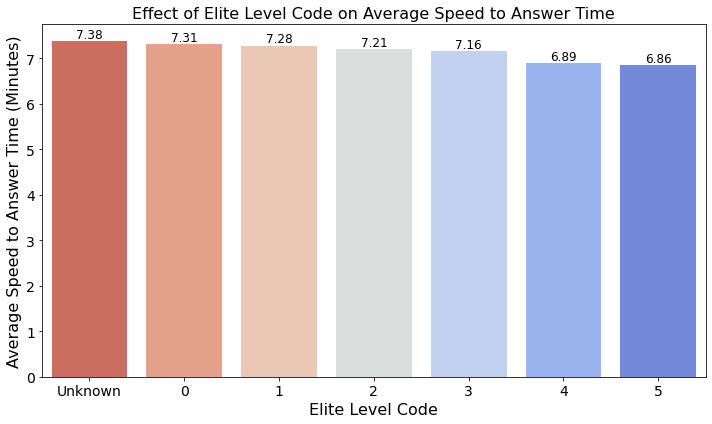

In [23]:
speed_to_answer_time = new_data.groupby('elite_level_code')['Speed_To_Answer_Time_(minutes)'].mean().reset_index()

speed_to_answer_time = speed_to_answer_time.sort_values(by='Speed_To_Answer_Time_(minutes)')

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='elite_level_code', y='Speed_To_Answer_Time_(minutes)', data=speed_to_answer_time, palette='coolwarm_r')

for index, row in speed_to_answer_time.iterrows():
    bar_plot.text(index, row['Speed_To_Answer_Time_(minutes)'], f'{row["Speed_To_Answer_Time_(minutes)"]:.2f}', 
                  color='black', ha='center', va='bottom', fontsize=12)

plt.title('Effect of Elite Level Code on Average Speed to Answer Time', fontsize=16)
plt.xlabel('Elite Level Code', fontsize=16)
plt.ylabel('Average Speed to Answer Time (Minutes)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()


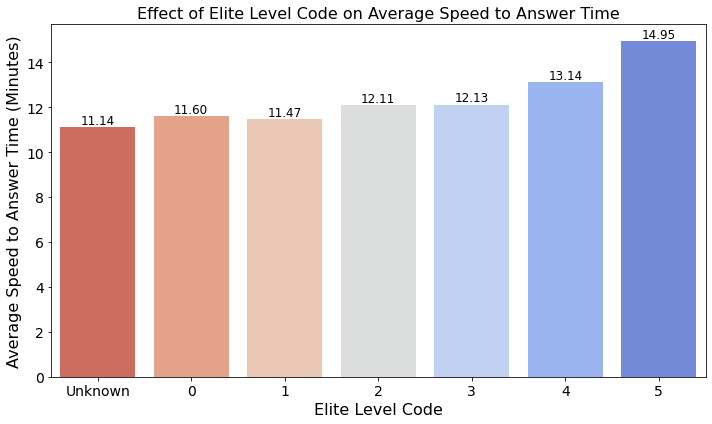

In [24]:
speed_to_answer_time = new_data.groupby('elite_level_code')['Handling_Time_(minutes)'].mean().reset_index()

speed_to_answer_time = speed_to_answer_time.sort_values(by='Handling_Time_(minutes)')

plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='elite_level_code', y='Handling_Time_(minutes)', data=speed_to_answer_time, palette='coolwarm_r')

for index, row in speed_to_answer_time.iterrows():
    bar_plot.text(index, row['Handling_Time_(minutes)'], f'{row["Handling_Time_(minutes)"]:.2f}', 
                  color='black', ha='center', va='bottom', fontsize=12)

plt.title('Effect of Elite Level Code on Average Speed to Answer Time', fontsize=16)
plt.xlabel('Elite Level Code', fontsize=16)
plt.ylabel('Average Speed to Answer Time (Minutes)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()
plt.show()


In [25]:
# Predicting "Primary Call Reasons" for test.csv
test = pd.read_csv("testbc7185d.csv")
print(test)

         call_id
0     7732610078
1     2400299738
2     6533095063
3     7774450920
4     9214147168
...          ...
5152  5300201106
5153   727694488
5154   147487837
5155  5330794838
5156  8332067080

[5157 rows x 1 columns]


In [26]:
#the Call_id in test.csv are same as the missing values already dealt with, so just merging them on the test file.
test = test.merge(new_data[['call_id', 'primary_call_reason']], on='call_id', how='left')
test.head(50)
# Save the DataFrame to a CSV file
test.to_csv('test.csv', index=False)

,call_id,primary_call_reason
0,7732610078,othertopics
1,2400299738,communications
2,6533095063,booking
3,7774450920,othertopics
4,9214147168,checkin
5,2931134074,booking
6,2010588624,othertopics
7,6611494442,upgrade
8,8655666048,othertopics
9,3564872843,upgrade
